<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguaje Natural

## Taller #7: Clasificación de textos
`Fecha de entrega: Abril 22, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [1]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [2]:
# Cargar datos
path = "C:/Users/Danilo/Documents/KonradLorenz/NLP/Taller7/reviews_vidjew_es.csv"
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


### `[8 pts]` Punto 1: Dividir el conjunto de datos en entrenamiento y prueba

In [3]:
train, test = train_test_split(data, test_size=0.3, random_state=21)

In [4]:
print(f"Tenemos {data.shape[0]} datos en total.")
print(f"El conjunto de datos de entrenamiento (train) tiene {train.shape[0]} datos.")
print(f"El conjunto de datos de prueba (test) tiene {test.shape[0]} datos.")

Tenemos 1000 datos en total.
El conjunto de datos de entrenamiento (train) tiene 700 datos.
El conjunto de datos de prueba (test) tiene 300 datos.


###  `[8 pts]` Punto 2: Hacer pre-procesamiento del texto

In [5]:
stopwords_sp = stopwords.words('spanish')
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)

In [6]:
X_train = tfidf_vect.fit_transform(train.review_body.values)
y_train = train.product_category.values

X_test = tfidf_vect.transform(test.review_body.values)
y_test = test.product_category.values

print(f"Tamaño de X_train (entrenamiento): {pd.DataFrame(X_train.toarray()).shape}")
print(f"Tamaño de X_test (prueba): {pd.DataFrame(X_test.toarray()).shape}")
print(f"Tamaño de y_train {len(y_train)} y tamaño de y_test {len(y_test)}")

Tamaño de X_train (entrenamiento): (700, 2968)
Tamaño de X_test (prueba): (300, 2968)
Tamaño de y_train 700 y tamaño de y_test 300


###  `[10 pts]` Punto 3: Entrenar el modelo
Puedes escoger el que quieras: Regresión Logística, Naive-Bayes, SVM, Árbol de Decisión, u otro.

In [7]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [8]:
y_pred_nb = nb.predict(X_test)

###  `[10 pts]` Punto 4: Métricas de evaluación
Exactitud, precisión y sensibilidad

In [9]:
data.product_category.value_counts(normalize=True)

jewelry        0.502
video_games    0.498
Name: product_category, dtype: float64

In [10]:
metricas = [accuracy_score, precision_score, recall_score, f1_score]
for metrica in metricas:
    if metrica == accuracy_score:
        print(metrica.__name__)
        print(f"Naive Bayes: {accuracy_score(y_test, y_pred_nb):>.2f}")
        print()
    else:
        print(metrica.__name__)
        print(f"Naive Bayes: {metrica(y_test, y_pred_nb, pos_label='jewelry'):.2f}")
        print()



accuracy_score
Naive Bayes: 0.85

precision_score
Naive Bayes: 0.77

recall_score
Naive Bayes: 0.96

f1_score
Naive Bayes: 0.85



In [11]:
print("Naive Bayes")
print(classification_report(y_test, y_pred_nb))

Naive Bayes
              precision    recall  f1-score   support

     jewelry       0.77      0.96      0.85       135
 video_games       0.95      0.76      0.85       165

    accuracy                           0.85       300
   macro avg       0.86      0.86      0.85       300
weighted avg       0.87      0.85      0.85       300



###  `[BONUS: 3 pts]` Matriz de confusión

Text(0.5, 1.0, 'Naive Bayes')

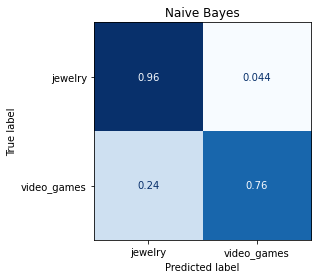

In [12]:
confusion_matrix(y_test, y_pred_nb)
plot_confusion_matrix(nb, X_test, y_test, cmap="Blues", normalize='true').im_.colorbar.remove()
plt.title("Naive Bayes")

###  `[12 pts]` Punto 5: Términos más importantes de cada categoría

In [13]:
vocab = {value:key for key,value in tfidf_vect.vocabulary_.items()}
vocab

{734: 'demasiado',
 2026: 'pequeños',
 1217: 'foto',
 1969: 'parecían',
 1675: 'mas',
 1297: 'grandes',
 1652: 'mando',
 2877: 'venia',
 352: 'caja',
 2625: 'solo',
 1033: 'envuelto',
 2104: 'plástico',
 323: 'burbujas',
 2160: 'precio',
 2119: 'podían',
 1325: 'haber',
 1769: 'molestado',
 1717: 'meterlo',
 1031: 'envoltorio',
 169: 'aparente',
 477: 'colgante',
 296: 'bonito',
 2025: 'pequeño',
 2102: 'plazo',
 1006: 'entrega',
 2575: 'sido',
 2505: 'rápido',
 643: 'cuerda',
 183: 'apretaba',
 339: 'cabeza',
 887: 'dos',
 1211: 'flores',
 349: 'caidas',
 262: 'base',
 601: 'corona',
 2874: 'vendido',
 2201: 'producto',
 1929: 'oro',
 2574: 'si',
 1432: 'indica',
 618: 'cosa',
 791: 'después',
 2054: 'persona',
 1358: 'hice',
 2407: 'regalo',
 844: 'dio',
 2333: 'reacción',
 129: 'alérgica',
 2146: 'porqué',
 1353: 'hecho',
 1712: 'metal',
 1701: 'menos',
 281: 'blanco',
 767: 'descripción',
 610: 'corresponde',
 1678: 'material',
 1490: 'joya',
 227: 'aunque',
 1439: 'inferior',
 170

In [14]:
[(vocab[e[0]], round(e[1],2)) for e in zip(nb.coef_[0].argsort(), sorted(nb.coef_[0]))][:10]

[('microscopio', -8.31),
 ('cristales', -8.31),
 ('critica', -8.31),
 ('cromado', -8.31),
 ('frágiles', -8.31),
 ('cts', -8.31),
 ('ponertelo', -8.31),
 ('segun', -8.31),
 ('cuarzo', -8.31),
 ('cuatro', -8.31)]

In [15]:
long = pd.DataFrame(X_test.toarray()).shape[1]

In [16]:
[(vocab[e[0]], round(e[1],2)) for e in zip(nb.coef_[0].argsort(), sorted(nb.coef_[0]))][long-10:long]

[('buen', -6.58),
 ('funciona', -6.5),
 ('solo', -6.46),
 ('si', -6.27),
 ('precio', -6.25),
 ('mando', -6.24),
 ('producto', -6.17),
 ('perfecto', -6.13),
 ('bien', -5.87),
 ('juego', -5.56)]

### `[2 pts]` Punto 6: Pregunta

- ¿Qué interpretación y/o conclusiones saca de su modelo?

En general es un muy buen modelo a pesar de ser sencillo ya que las metricas están por encima de un 85%, también se realiza la verificación por medio de las palabras más importantes, en donde para este caso de la Joyeria las palabras menos importantes son juego, funciona, mando... En donde son palabras propias o muy comunes de la categoria de video juegos.